Projet DATA : Analyse des données DVF

Mohammad Darmsy Ladha
Doris Colin
Julie Chen


Introduction :

Le machine learning est une technique informatique qui permet à une machine d'apprendre à partir de données, sans qu'un programme spécifique lui soit directement programmé. Le principe est de fournir à l'algorithme un grand nombre d'exemples pour qu'il apprenne à identifier des modèles et à prendre des décisions à partir de ces modèles. Le machine learning est utilisé dans de nombreux domaines, tels que la reconnaissance de formes, la classification de données, la détection de fraudes, la recommandation de produits, la traduction de langues, la reconnaissance vocale ou encore la conduite autonome.

Ce projet consiste à expliquer le prix de la valeur foncière en France selon une multitude de facteurs. On peut citer le code postal, la surface terrain, la surface réelle batie...

 Pour cela, nous allons utiliser plusieurs méthodes afin de préparer nos données, de les analyser et de les modéliser grâce aux TD que nous avons pu effectuer en cours, mais ainsi qu'à la documentation d'internet.

Sommaire :

- A) Préparation des données
- B) Analyse exploratoire des données
- C) Modélisation des données
- D) Evaluation des modèles


A) Préparation des données

Afin de préparer nos données, nous allons supprimer les colonnes comprenant de nombreuses valeurs nulles. En effet, lorsqu'une colonne présente plus de 90% il est mieux de la supprimer, car compléter toutes les valeurs manquantes peut créer un biais dans l'analyse. Pour cela, nous avons créé un algorithme qui permet de nous indiquer le pourcentage de valeurs nulles dans chaque colonne.

In [23]:
import pandas as pd
data = pd.read_csv("./data/valeursfoncieres-2022.txt", delimiter='|')

data

/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/691056903.py:2: DtypeWarning: Columns (18,23,24,26,28,29,31,33,41) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/valeursfoncieres-2022.txt", delimiter='|')


,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,24.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,03/01/2022,Vente,...,NaN,1,2.0,Appartement,NaN,140.0,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,4.0,Local industriel. commercial ou assimilé,NaN,327.0,0.0,NaN,NaN,NaN
3803881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3803882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,19/12/2022,Vente,...,NaN,2,2.0,Appartement,NaN,40.0,3.0,NaN,NaN,NaN
3803883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,30/12/2022,Vente,...,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN


In [24]:
# Affichage des pourcentages de données nulles par colonne

def naPourcentage(data):
    L = []
    for col in data:
        null_count = data[col].isnull().sum()
        percent = null_count/(data.shape[0])*100
        L.append([col, percent])
    return L

print(naPourcentage(data))

[['Identifiant de document', 100.0], ['Reference document', 100.0], ['1 Articles CGI', 100.0], ['2 Articles CGI', 100.0], ['3 Articles CGI', 100.0], ['4 Articles CGI', 100.0], ['5 Articles CGI', 100.0], ['No disposition', 0.0], ['Date mutation', 0.0], ['Nature mutation', 0.0], ['Valeur fonciere', 0.6498882063995101], ['No voie', 34.733621021666], ['B/T/Q', 95.3740189306459], ['Type de voie', 36.9842936892151], ['Code voie', 1.0263980115066569], ['Voie', 1.029289791883824], ['Code postal', 1.029815570134218], ['Commune', 0.0], ['Code departement', 0.0], ['Code commune', 0.0], ['Prefixe de section', 95.82429542428333], ['Section', 0.004074781440553539], ['No plan', 0.0], ['No Volume', 99.765792078362], ['1er lot', 66.63114158288171], ['Surface Carrez du 1er lot', 90.33256788783048], ['2eme lot', 89.535277748933], ['Surface Carrez du 2eme lot', 96.74175218230835], ['3eme lot', 98.13467021216466], ['Surface Carrez du 3eme lot', 99.63566196138947], ['4eme lot', 99.40261075190233], ['Surface

Ainsi, nous allons supprimer : Identifiant de document, Reference document, 1 Articles CGI, 2 Articles CGI, 3 Articles CGI, 4 Articles CGI, 5 Articles CGI, B/T/Q, Prefixe de section, No Volume, 1er lot, Surface Carrez du 1er lot, 2eme lot, Surface Carrez du 2eme lot, 3eme lot, Surface Carrez du 3eme lot, 4eme lot, Surface Carrez du 4eme lot, 5eme lot, Surface Carrez du 5eme lot, Identifiant local, Nature culture speciale.

In [25]:
# Suppression des colonnes contenant beaucoup de valeurs NaN

colonnes_a_supprimer = ["Identifiant de document", "Reference document", "1 Articles CGI", "2 Articles CGI", "3 Articles CGI", "4 Articles CGI","5 Articles CGI","B/T/Q","Prefixe de section","No Volume","1er lot","Surface Carrez du 1er lot","2eme lot","Surface Carrez du 2eme lot","3eme lot","Surface Carrez du 3eme lot", "4eme lot", "Surface Carrez du 4eme lot","5eme lot", "Surface Carrez du 5eme lot", "Identifiant local", "Nature culture speciale"]

data = data.drop(colonnes_a_supprimer, axis=1)

data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,...,53,AM,102,1,2.0,Appartement,24.0,1.0,NaN,NaN
1,1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,...,398,ZE,184,0,NaN,NaN,NaN,NaN,S,84.0
2,1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,...,398,ZE,185,0,NaN,NaN,NaN,NaN,S,88.0
3,1,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,...,398,ZE,187,1,2.0,Appartement,140.0,3.0,NaN,NaN
4,1,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,...,243,A,643,0,NaN,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,1,30/12/2022,Vente,"3500000,00",19.0,RUE,4879,JEAN DOLENT,75014.0,PARIS 14,...,114,AS,41,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN
3803881,1,19/12/2022,Vente,"525000,00",3.0,RUE,3842,FREDERIC MAGISSON,75015.0,PARIS 15,...,115,EJ,51,2,3.0,Dépendance,0.0,0.0,NaN,NaN
3803882,1,19/12/2022,Vente,"525000,00",3.0,RUE,3842,FREDERIC MAGISSON,75015.0,PARIS 15,...,115,EJ,51,2,2.0,Appartement,40.0,3.0,NaN,NaN
3803883,1,30/12/2022,Vente,"15500,00",69.0,RUE,0679,BARRAULT,75013.0,PARIS 13,...,113,DM,28,1,3.0,Dépendance,0.0,0.0,NaN,NaN


Ensuite, nous vérifions s'il n'y a pas de doublons dans les lignes. Si oui, nous les supprimons.

In [26]:
# Suppression des doublons

data = data.drop_duplicates()

data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,03/01/2022,Vente,"55000,00",13.0,RUE,2280,DE LA LIBERTE,1000.0,BOURG-EN-BRESSE,...,53,AM,102,1,2.0,Appartement,24.0,1.0,NaN,NaN
1,1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,...,398,ZE,184,0,NaN,NaN,NaN,NaN,S,84.0
2,1,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480.0,SAVIGNEUX,...,398,ZE,185,0,NaN,NaN,NaN,NaN,S,88.0
3,1,03/01/2022,Vente,"143000,00",98.0,RTE,0055,DE LA DOMBES,1480.0,SAVIGNEUX,...,398,ZE,187,1,2.0,Appartement,140.0,3.0,NaN,NaN
4,1,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480.0,MESSIMY SUR SAONE,...,243,A,643,0,NaN,NaN,NaN,NaN,T,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,1,30/12/2022,Vente,"3500000,00",19.0,RUE,4879,JEAN DOLENT,75014.0,PARIS 14,...,114,AS,41,1,4.0,Local industriel. commercial ou assimilé,327.0,0.0,NaN,NaN
3803881,1,19/12/2022,Vente,"525000,00",3.0,RUE,3842,FREDERIC MAGISSON,75015.0,PARIS 15,...,115,EJ,51,2,3.0,Dépendance,0.0,0.0,NaN,NaN
3803882,1,19/12/2022,Vente,"525000,00",3.0,RUE,3842,FREDERIC MAGISSON,75015.0,PARIS 15,...,115,EJ,51,2,2.0,Appartement,40.0,3.0,NaN,NaN
3803883,1,30/12/2022,Vente,"15500,00",69.0,RUE,0679,BARRAULT,75013.0,PARIS 13,...,113,DM,28,1,3.0,Dépendance,0.0,0.0,NaN,NaN


Nous nous apercevons qu'il y a des valeurs nulles dans des colonnes non numériques. Ne pouvant les remplacer, nous allons les supprimer.

In [27]:
# Suppression des valeurs nulles dans les colonnes non numériques

import numpy as np

columns_non_numeric = data.select_dtypes(exclude=[np.number]).columns
columns_with_nulls = data[columns_non_numeric].isnull().any()
data = data.dropna(subset=columns_with_nulls.index)

data

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
5,1,06/01/2022,Vente,"255000,00",282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,...,230,ZM,124,0,1.0,Maison,108.0,5.0,S,649.0
8,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,S,628.0
9,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,2.0,Appartement,126.0,4.0,S,628.0
13,1,03/01/2022,Vente,"140000,00",6.0,RUE,0397,DE BEAUGENCY,1000.0,BOURG-EN-BRESSE,...,53,BZ,175,0,1.0,Maison,100.0,4.0,S,796.0
21,1,10/01/2022,Vente,"580000,00",45.0,RUE,0119,DES COMBES,1500.0,AMBRONAY,...,7,ZN,521,0,3.0,Dépendance,0.0,0.0,S,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803692,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,14.0,1.0,S,265.0
3803693,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,78.0,3.0,S,265.0
3803694,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,17.0,1.0,S,265.0
3803705,1,30/12/2022,Vente,"3100000,00",82.0,AV,2816,DU DOC ARNOLD NETTER,75012.0,PARIS 12,...,112,AI,5,0,4.0,Local industriel. commercial ou assimilé,709.0,0.0,S,258.0


Puisque nous ne pouvons pas remplacer le code postal ou l'écrire à la main pour chaque valeur nulle nous allons supprimer ces lignes.

In [28]:
# Suppression des valeurs nulles dans la colonne Code postal

data.dropna(subset=['Code postal'], inplace=True)

data

/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/3472238700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Code postal'], inplace=True)


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
5,1,06/01/2022,Vente,"255000,00",282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,...,230,ZM,124,0,1.0,Maison,108.0,5.0,S,649.0
8,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,S,628.0
9,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,2.0,Appartement,126.0,4.0,S,628.0
13,1,03/01/2022,Vente,"140000,00",6.0,RUE,0397,DE BEAUGENCY,1000.0,BOURG-EN-BRESSE,...,53,BZ,175,0,1.0,Maison,100.0,4.0,S,796.0
21,1,10/01/2022,Vente,"580000,00",45.0,RUE,0119,DES COMBES,1500.0,AMBRONAY,...,7,ZN,521,0,3.0,Dépendance,0.0,0.0,S,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803692,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,14.0,1.0,S,265.0
3803693,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,78.0,3.0,S,265.0
3803694,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,17.0,1.0,S,265.0
3803705,1,30/12/2022,Vente,"3100000,00",82.0,AV,2816,DU DOC ARNOLD NETTER,75012.0,PARIS 12,...,112,AI,5,0,4.0,Local industriel. commercial ou assimilé,709.0,0.0,S,258.0


Pour remplir les valeurs manquantes, nous allons mettre la médiane de chaque colonne. En effet, la médiane est une mesure de tendance centrale qui représente la valeur au milieu de l'ensemble de données trié. Contrairement à la moyenne, qui peut être sensible aux valeurs aberrantes, la médiane est une mesure qui est moins sensible aux valeurs extrêmes. Cela permet la distribution des valeurs de la colonne et minimiser les effets des valeurs aberrantes. Pour les colonnes qui ne possèdent pas de valeurs chiffrées, nous allons supprimer les lignes.

In [29]:
# Remplissage des valeurs nulles par la médiane

null_columns = data.columns[data.isnull().any()]
print(null_columns)

median_value = data['No voie'].median()
data['No voie'] = data['No voie'].fillna(median_value)

median_value_2 = data['Surface reelle bati'].median()
data['Surface reelle bati'] = data['Surface reelle bati'].fillna(median_value_2)

median_value_3 = data['Nombre pieces principales'].median()
data['Nombre pieces principales'] = data['Nombre pieces principales'].fillna(median_value_3)

data

Index(['No voie', 'Surface reelle bati', 'Nombre pieces principales'], dtype='object')


/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/3559704934.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['No voie'] = data['No voie'].fillna(median_value)
/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/3559704934.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Surface reelle bati'] = data['Surface reelle bati'].fillna(median_value_2)
/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/3559704934.py:13: SettingWithCopyWarning: 
A value is try

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
5,1,06/01/2022,Vente,"255000,00",282.0,RTE,0130,DE POISATON,1560.0,MANTENAY-MONTLIN,...,230,ZM,124,0,1.0,Maison,108.0,5.0,S,649.0
8,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,S,628.0
9,1,03/01/2022,Vente,"525000,00",217.0,PL,0300,DE LA CROIX BLANCHE,1390.0,SAINT-ANDRE-DE-CORCY,...,333,AN,186,0,2.0,Appartement,126.0,4.0,S,628.0
13,1,03/01/2022,Vente,"140000,00",6.0,RUE,0397,DE BEAUGENCY,1000.0,BOURG-EN-BRESSE,...,53,BZ,175,0,1.0,Maison,100.0,4.0,S,796.0
21,1,10/01/2022,Vente,"580000,00",45.0,RUE,0119,DES COMBES,1500.0,AMBRONAY,...,7,ZN,521,0,3.0,Dépendance,0.0,0.0,S,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803692,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,14.0,1.0,S,265.0
3803693,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,78.0,3.0,S,265.0
3803694,1,28/12/2022,Vente,"12281000,00",116.0,RUE,0272,AMELOT,75011.0,PARIS 11,...,111,AO,74,0,2.0,Appartement,17.0,1.0,S,265.0
3803705,1,30/12/2022,Vente,"3100000,00",82.0,AV,2816,DU DOC ARNOLD NETTER,75012.0,PARIS 12,...,112,AI,5,0,4.0,Local industriel. commercial ou assimilé,709.0,0.0,S,258.0


Afin de finir de préparer notre dataset, nous allons normaliser les colonnes : valeur foncière, surface reelle batiment, nombre pièces, surface terrain. Cela permet de réduire l'écart entre ces données qui peuvent varier très différemment.

In [30]:
#from sklearn.preprocessing import MinMaxScaler

#columns_to_normalize = ["Valeur fonciere", "Surface reelle bati", "Surface terrain"]
#scaler = MinMaxScaler()
#data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

#data

Pour faciliter les analyses, nous convertissons notre dataset en fichier csv après avoir préparé nos données.

In [31]:
# Conversion du fichier en csv

data.to_csv('./data/DataSet.csv', index=False)

B) Analyse exploratoire des données

Afin de faire un aperçu des données, nous utilisons plusieurs fonctions :

In [32]:
import pandas as pd
data = pd.read_csv("./data/DataSet.csv")

# Affiche le type de chaque colonne et si elles sont nulles ou non
data.info()

# Affiche la distribution, la plage de valeurs et la signification de chaque colonne
data.describe()

/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/213937085.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./data/DataSet.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847708 entries, 0 to 847707
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   No disposition             847708 non-null  int64  
 1   Date mutation              847708 non-null  object 
 2   Nature mutation            847708 non-null  object 
 3   Valeur fonciere            847708 non-null  object 
 4   No voie                    847708 non-null  float64
 5   Type de voie               847708 non-null  object 
 6   Code voie                  847708 non-null  object 
 7   Voie                       847708 non-null  object 
 8   Code postal                847708 non-null  float64
 9   Commune                    847708 non-null  object 
 10  Code departement           847708 non-null  object 
 11  Code commune               847708 non-null  int64  
 12  Section                    847708 non-null  object 
 13  No plan                    84

,No disposition,No voie,Code postal,Code commune,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,8.477080e+05
mean,1.025033,368.535244,51273.340755,226.750471,396.163527,0.003823,1.796172,107.833387,2.748011,8.982907e+02
std,0.179692,1394.910456,26443.122488,177.145645,544.807265,0.061714,1.032504,638.241465,2.297701,6.270187e+03
min,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,8.000000,30670.000000,85.000000,92.000000,0.000000,1.000000,0.000000,0.000000,2.380000e+02
50%,1.000000,21.000000,52600.000000,189.000000,218.000000,0.000000,1.000000,76.000000,3.000000,5.000000e+02
75%,1.000000,67.000000,76280.000000,325.000000,477.000000,0.000000,3.000000,110.000000,4.000000,8.100000e+02
max,27.000000,9999.000000,97490.000000,909.000000,9842.000000,1.000000,4.000000,98000.000000,80.000000,3.760000e+06


info() permet d'afficher le type de chaque colonne et si elles sont nulles ou non.
describe() permet d'afficher la somme de toutes les lignes de chaque colonne avec "count", la moyenne de la colonne avec "mean", l'écart-type de la colonne avec "std", le minimum et le maximum de chaque colonne avec "min" et "max". De plus, nous avons les 25%, les 50% et les 75% premières valeurs de chaque colonne.

Pour afficher les valeurs non numériques sous forme de diagramme et les utiliser dans notre analyse, nous devons changer leurs types. Ainsi, nous allons les transformer en type énuméré. Si cela n'est pas possible, nous ne pouvons que supprimer la colonne.

In [33]:
# Remplacer les virgules par des points dans les valeurs de la colonne "Valeur fonciere"
data["Valeur fonciere"] = data["Valeur fonciere"].str.replace(",", ".")

# Convertir la colonne en type float
data["Valeur fonciere"] = data["Valeur fonciere"].astype(float)

# Date mutation : on la convertit en date
data['Date mutation'] = pd.to_datetime(data['Date mutation'])

# Nature mutation : on va créer un enum pour cette colonne
data['Nature mutation'] = data['Nature mutation'].astype('category')

# Type de voie : on va créer un enum pour cette colonne
data['Type de voie'] = data['Type de voie'].astype('category')

# Code voie : la colonne est une colonne de type hex, pour simplifier on la supprime
data = data.drop(columns=['Code voie'], axis=1)

# Voie : Il y a trop de valeurs différentes. Nous avons considéré que cette colonne dépendait de la ville, nous l'avons donc supprimée
data = data.drop(columns=['Voie'])

# Commune : elle est directement liée au code postal, donc elle n'est pas utile
data = data.drop(columns=['Commune'], axis=1)

# Code departement : On a déjà le code postal, donc cette colonne n'est pas utile
data = data.drop(columns=['Code departement'], axis=1)

# Section : on va créer un enum pour cette colonne
data['Section'] = data['Section'].astype('category')

# Type local : on va créer un enum pour cette colonne
data['Type local'] = data['Type local'].astype('category')

# Nature culture : on va créer un enum pour cette colonne
data['Nature culture'] = data['Nature culture'].astype('category')

data

/var/folders/29/jk9lm8hj2fxf5p1bbvw0cv5c0000gn/T/ipykernel_9584/1323325515.py:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date mutation'] = pd.to_datetime(data['Date mutation'])


,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code postal,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,1,2022-06-01,Vente,255000.0,282.0,RTE,1560.0,230,ZM,124,0,1.0,Maison,108.0,5.0,S,649.0
1,1,2022-03-01,Vente,525000.0,217.0,PL,1390.0,333,AN,186,0,4.0,Local industriel. commercial ou assimilé,424.0,0.0,S,628.0
2,1,2022-03-01,Vente,525000.0,217.0,PL,1390.0,333,AN,186,0,2.0,Appartement,126.0,4.0,S,628.0
3,1,2022-03-01,Vente,140000.0,6.0,RUE,1000.0,53,BZ,175,0,1.0,Maison,100.0,4.0,S,796.0
4,1,2022-10-01,Vente,580000.0,45.0,RUE,1500.0,7,ZN,521,0,3.0,Dépendance,0.0,0.0,S,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847703,1,2022-12-28,Vente,12281000.0,116.0,RUE,75011.0,111,AO,74,0,2.0,Appartement,14.0,1.0,S,265.0
847704,1,2022-12-28,Vente,12281000.0,116.0,RUE,75011.0,111,AO,74,0,2.0,Appartement,78.0,3.0,S,265.0
847705,1,2022-12-28,Vente,12281000.0,116.0,RUE,75011.0,111,AO,74,0,2.0,Appartement,17.0,1.0,S,265.0
847706,1,2022-12-30,Vente,3100000.0,82.0,AV,75012.0,112,AI,5,0,4.0,Local industriel. commercial ou assimilé,709.0,0.0,S,258.0


In [34]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847708 entries, 0 to 847707
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   No disposition             847708 non-null  int64         
 1   Date mutation              847708 non-null  datetime64[ns]
 2   Nature mutation            847708 non-null  category      
 3   Valeur fonciere            847708 non-null  float64       
 4   No voie                    847708 non-null  float64       
 5   Type de voie               847708 non-null  category      
 6   Code postal                847708 non-null  float64       
 7   Code commune               847708 non-null  int64         
 8   Section                    847708 non-null  category      
 9   No plan                    847708 non-null  int64         
 10  Nombre de lots             847708 non-null  int64         
 11  Code type local            847708 non-null  float64 

,No disposition,Valeur fonciere,No voie,Code postal,Code commune,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain
count,847708.000000,8.477080e+05,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,847708.000000,8.477080e+05
mean,1.025033,7.302395e+05,368.535244,51273.340755,226.750471,396.163527,0.003823,1.796172,107.833387,2.748011,8.982907e+02
std,0.179692,7.426338e+06,1394.910456,26443.122488,177.145645,544.807265,0.061714,1.032504,638.241465,2.297701,6.270187e+03
min,1.000000,1.500000e-01,1.000000,1000.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,1.370000e+05,8.000000,30670.000000,85.000000,92.000000,0.000000,1.000000,0.000000,0.000000,2.380000e+02
50%,1.000000,2.300000e+05,21.000000,52600.000000,189.000000,218.000000,0.000000,1.000000,76.000000,3.000000,5.000000e+02
75%,1.000000,3.804000e+05,67.000000,76280.000000,325.000000,477.000000,0.000000,3.000000,110.000000,4.000000,8.100000e+02
max,27.000000,7.225900e+08,9999.000000,97490.000000,909.000000,9842.000000,1.000000,4.000000,98000.000000,80.000000,3.760000e+06


Pour examiner la relation entre les variables caractéristiques (chaque colonne) et la variable cible (Valeur fonciere) on utilise des techniques graphiques telles que des histogrammes :

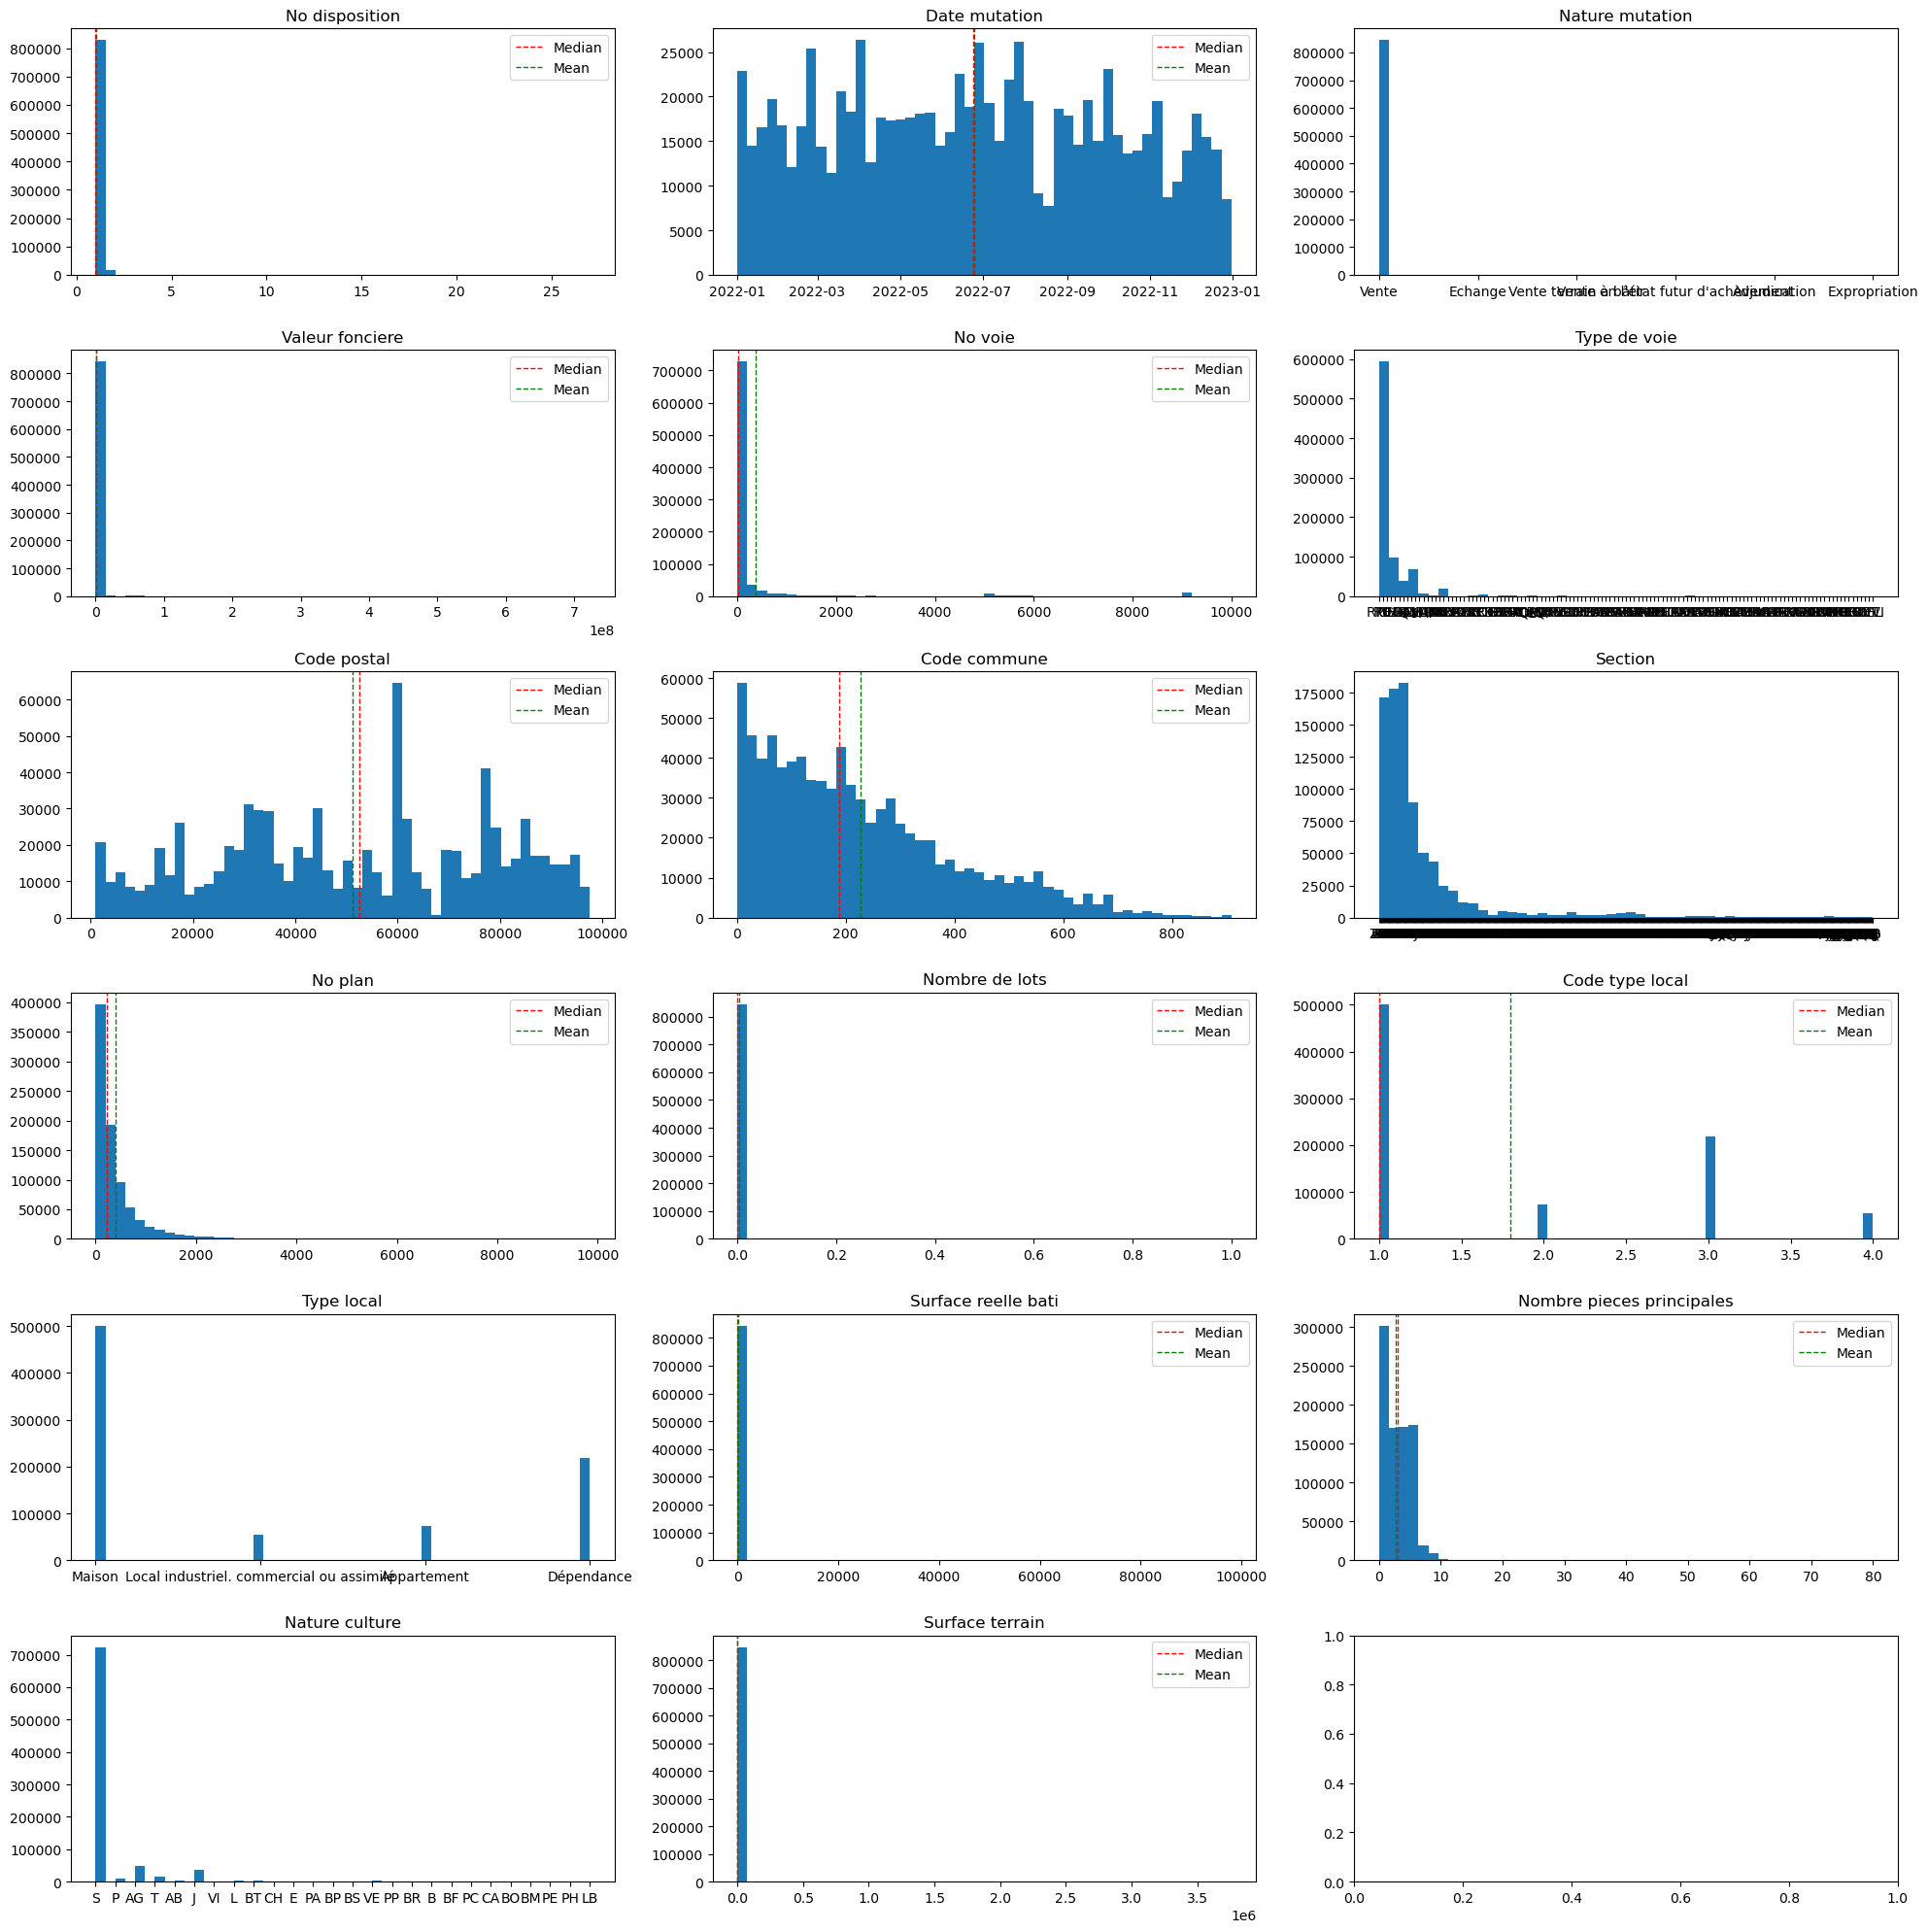

In [35]:
# Création des histrogrammes

import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 3, figsize=(20, 20))
for i, column in enumerate(data.columns):
    axs[i//3, i%3].hist(data[column], bins=50)
    axs[i//3, i%3].set_title(column)
    if data[column].dtype.name != 'category':
        axs[i//3, i%3].axvline(data[column].median(), color='r', linestyle='dashed', linewidth=1, label='Median')
        axs[i//3, i%3].axvline(data[column].mean(), color='g', linestyle='dashed', linewidth=1, label='Mean')
        axs[i//3, i%3].legend()

plt.tight_layout()
plt.show()

On peut remarquer sur les diagrammes :

- No disposition : distribution asymétrique gauche
- Date mutation : distribution asymétrique
- Valeur fonciere : distribution symétrique gauche
- No voie : distribution asymétrique droite
- Code postal : distribution asymétrique gauche
- Code commune : distribution asymétrique droite
- No plan : distribution asymétrique droite
- Nombre de lots : distribution asymétrique gauche
- Code type local : distribution asymétrique
- Surface reelle bati : distribution asymétrique gauche
- Nombre pieces principales : distribution asymétrique droite
- Surface terrain : distribution asymétrique gauche

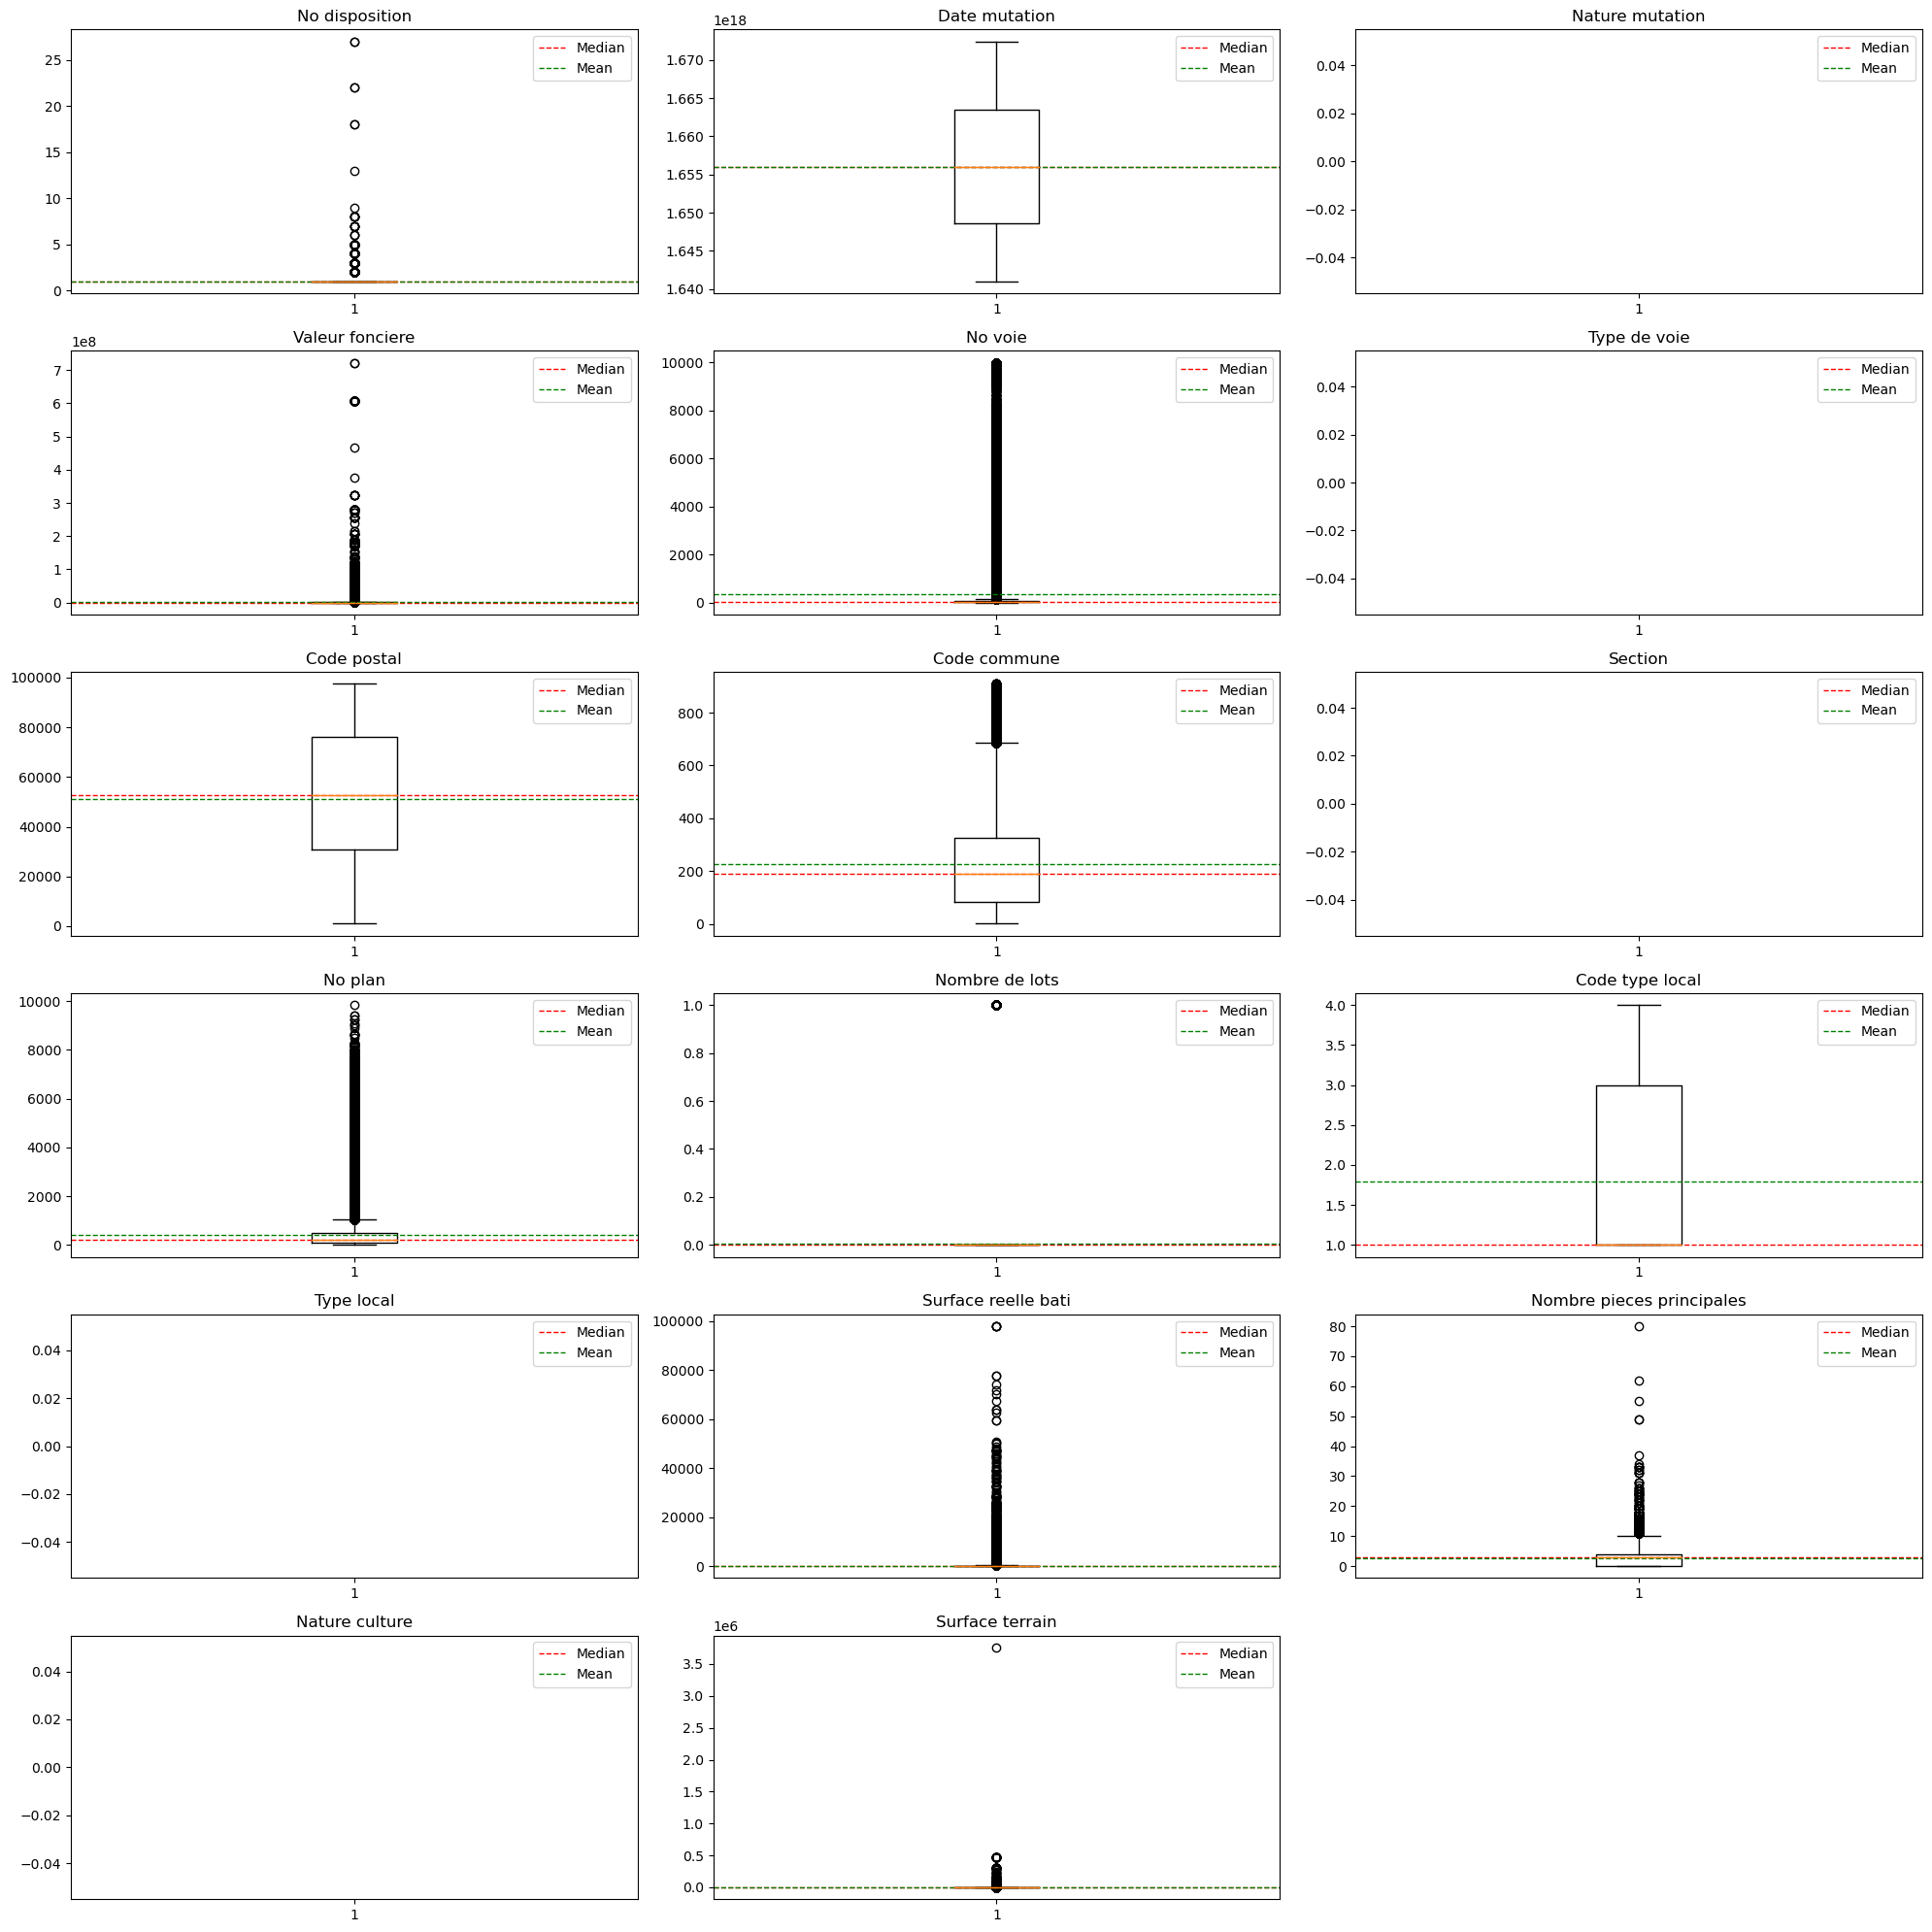

In [36]:
# Création des diagrammes en boîte

import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.3)

for i, column in enumerate(data.columns):
    column_data = pd.to_numeric(data[column], errors='coerce')
    plt.subplot(6, 3, i+1)
    plt.boxplot(column_data)
    plt.title(column)
    if column_data.dtype.name != 'category':
        plt.axhline(column_data.median(), color='r', linestyle='dashed', linewidth=1, label='Median')
        plt.axhline(column_data.mean(), color='g', linestyle='dashed', linewidth=1, label='Mean')
        plt.legend()

plt.tight_layout()
plt.show()

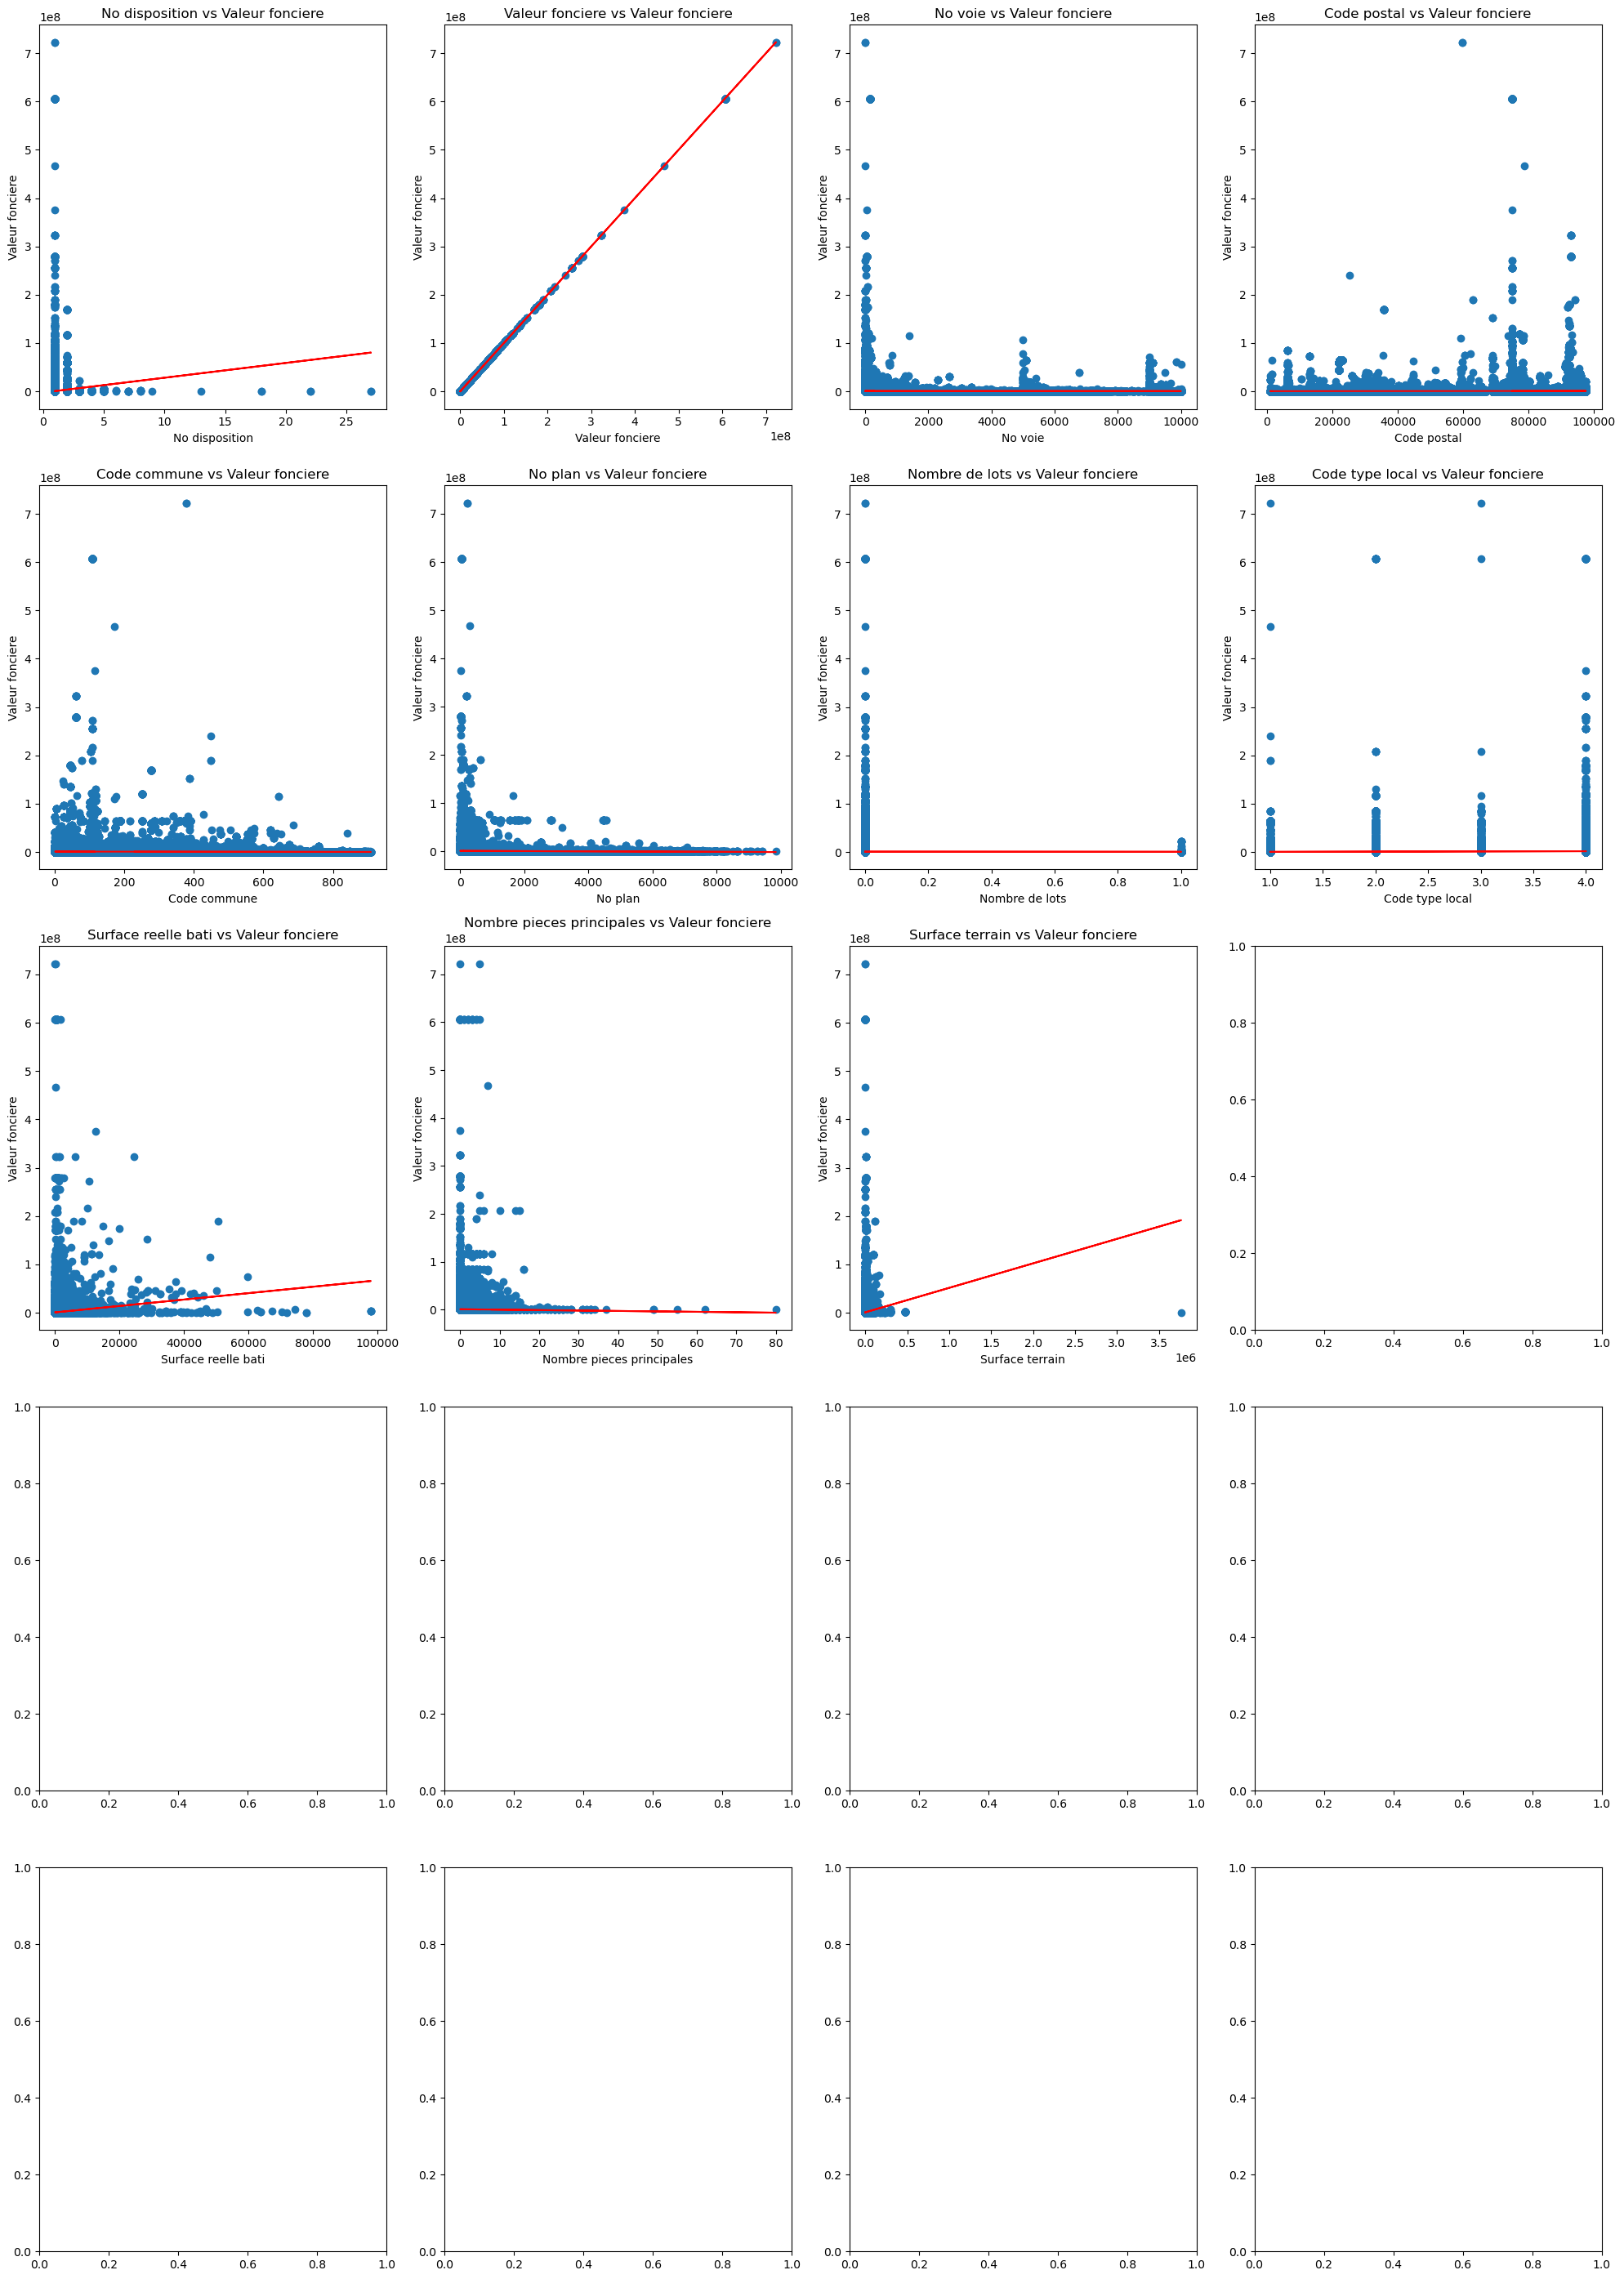

In [37]:
# Création des diagrammes de dispersion

import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(5, 4, figsize=(20, 28))

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for i, column in enumerate(numerical_columns):
    axs[i//4, i%4].set_xlabel(column)
    axs[i//4, i%4].scatter(data[column], data['Valeur fonciere'])
    axs[i//4, i%4].set_ylabel('Valeur fonciere')
    axs[i//4, i%4].set_title(f'{column} vs Valeur fonciere')

    if data[column].dtype == np.datetime64:
        reference_date = np.datetime64('2000-01-01')  # Remplacez avec votre date de référence
        x = (data[column] - reference_date) / np.timedelta64(1, 'D')
    else:
        x = data[column].astype(float)
    
    m, b = np.polyfit(x, data['Valeur fonciere'], 1)
    axs[i//4, i%4].plot(x, m*x + b, '-', color='red')

plt.tight_layout()
plt.show()
